### Grid Search sklearn

In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

### import titanic df

In [61]:
# get titanic files as a DataFrame
titanic_dataframe = pd.read_csv("https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar1/titanic/train.csv")#, index_col='PassengerId')

#### features

In [62]:
X = titanic_dataframe.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"],axis=1)

#### target 

In [63]:
Y = titanic_dataframe.Survived

In [64]:
X = pd.get_dummies(X)

In [65]:
X.fillna({'Age':X.Age.median()}, inplace=True)

In [9]:
#X.isna().sum()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [71]:
#X_train

In [67]:
from sklearn.model_selection import GridSearchCV

In [12]:
clf = tree.DecisionTreeClassifier()

In [13]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth':range(1,30)}

In [14]:
grid_search_CV_clf = GridSearchCV(clf, parameters, cv=5)

In [15]:
grid_search_CV_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [16]:
grid_search_CV_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [17]:
best_clf = grid_search_CV_clf.best_estimator_

In [18]:
type(best_clf)

sklearn.tree._classes.DecisionTreeClassifier

In [19]:
best_clf.score(X_test, y_test)

0.7898305084745763

In [20]:
from sklearn.metrics import precision_score, recall_score

In [21]:
y_pred = best_clf.predict(X_test)

### Precision score

In [22]:
precision_score(y_test, y_pred)

0.8085106382978723

### Recall score

In [23]:
recall_score(y_test, y_pred)

0.6333333333333333

### Predicted probability

In [24]:
y_pred_probality = best_clf.predict_proba(X_test)

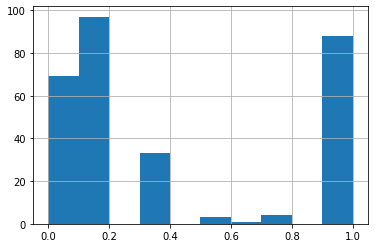

In [25]:
pd.Series(y_pred_probality[:,1]).hist()

### Как перекодировать классы с новым порогом вероятности 

In [26]:
y_pred = np.where(y_pred_probality[:,1]>0.9, 1, 0)

In [27]:
precision_score(y_test, y_pred)

0.8181818181818182

In [28]:
recall_score(y_test, y_pred)

0.6

### ROC-curve 

In [29]:
from sklearn.metrics import roc_curve, auc

<function matplotlib.pyplot.show(*args, **kw)>

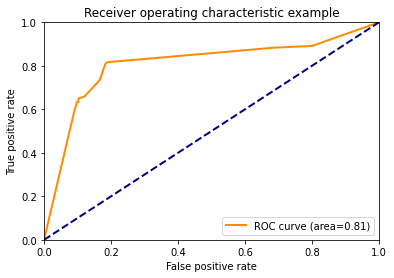

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probality[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label = 'ROC curve (area=%0.2f)'%roc_auc)
plt.plot([0, 1],[0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show
                                 

# Practice part

In [31]:
heart_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')

In [32]:
heart_df

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [34]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [35]:
train_heart = heart_df[['sex', 'exang']]

In [36]:
#train_heart.drop('sex', axis=1)
train_heart

,sex,exang
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0
...,...,...
233,1,0
234,1,1
235,1,0
236,1,1


In [37]:
y_heart = heart_df.num

In [38]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [39]:
clf.fit(train_heart, y_heart)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

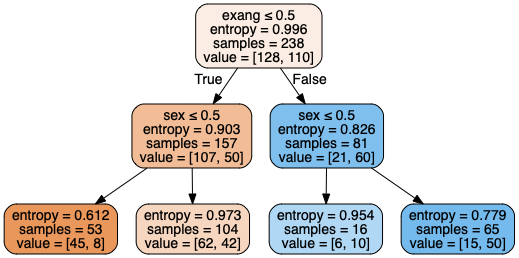

In [41]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,\
                special_characters=True, feature_names=train_heart.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

information gain

[Text(167.4, 181.2, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

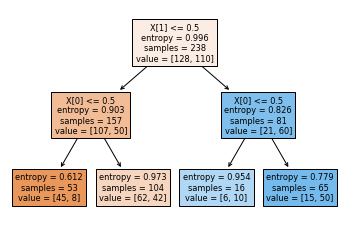

In [43]:
tree.plot_tree(clf, filled=True)

In [44]:
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
n1 = clf.tree_.n_node_samples[l_node] # кол-во сэмплов в левом поддереве
e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева

r_node = clf.tree_.children_right[0] # индекс корня левого поддерева
n2 = clf.tree_.n_node_samples[r_node] # кол-во сэмплов в правом поддереве
e2 = clf.tree_.impurity[r_node] # энтропия в корне правого поддерева

print('Кол-во сэмплов в левом поддереве: {n1}'.format(n1=n1))
print('энтропия в корне левого поддерева: {e1}'.format(e1=e1))
print('Кол-во сэмплов в правом поддереве: {n2}'.format(n2=n2))
print('энтропия в корне правого поддерева: {e2}'.format(e2=e2))
Entropy = 0.996
IG_heart = Entropy - (n1*e1+n2*e2)/(n1+n2)
print('Information gain is equal: {IG}'.format(IG=IG_heart))

Кол-во сэмплов в левом поддереве: 157
энтропия в корне левого поддерева: 0.9027113410339267
Кол-во сэмплов в правом поддереве: 81
энтропия в корне правого поддерева: 0.8256265261578954
Information gain is equal: 0.11952340688606711


In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

In [46]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted = dt.predict(X_test)

In [47]:
predicted = dt.predict(X_test)

### task GridSearchCV 

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
best_tree = {'min_samples_split': range(2,10), 
              'max_depth':range(1,10),
              'min_samples_leaf':range(1,10)}
clf = DecisionTreeClassifier()
search = GridSearchCV(clf, best_tree)


In [50]:
from sklearn.metrics import confusion_matrix
#confusion_matrix()

TypeError: confusion_matrix() missing 2 required positional arguments: 'y_true' and 'y_pred'

# Week 3 

In [51]:
from sklearn import tree

In [52]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)

In [54]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
train_names = X_train
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

NameError: name 'Source' is not defined

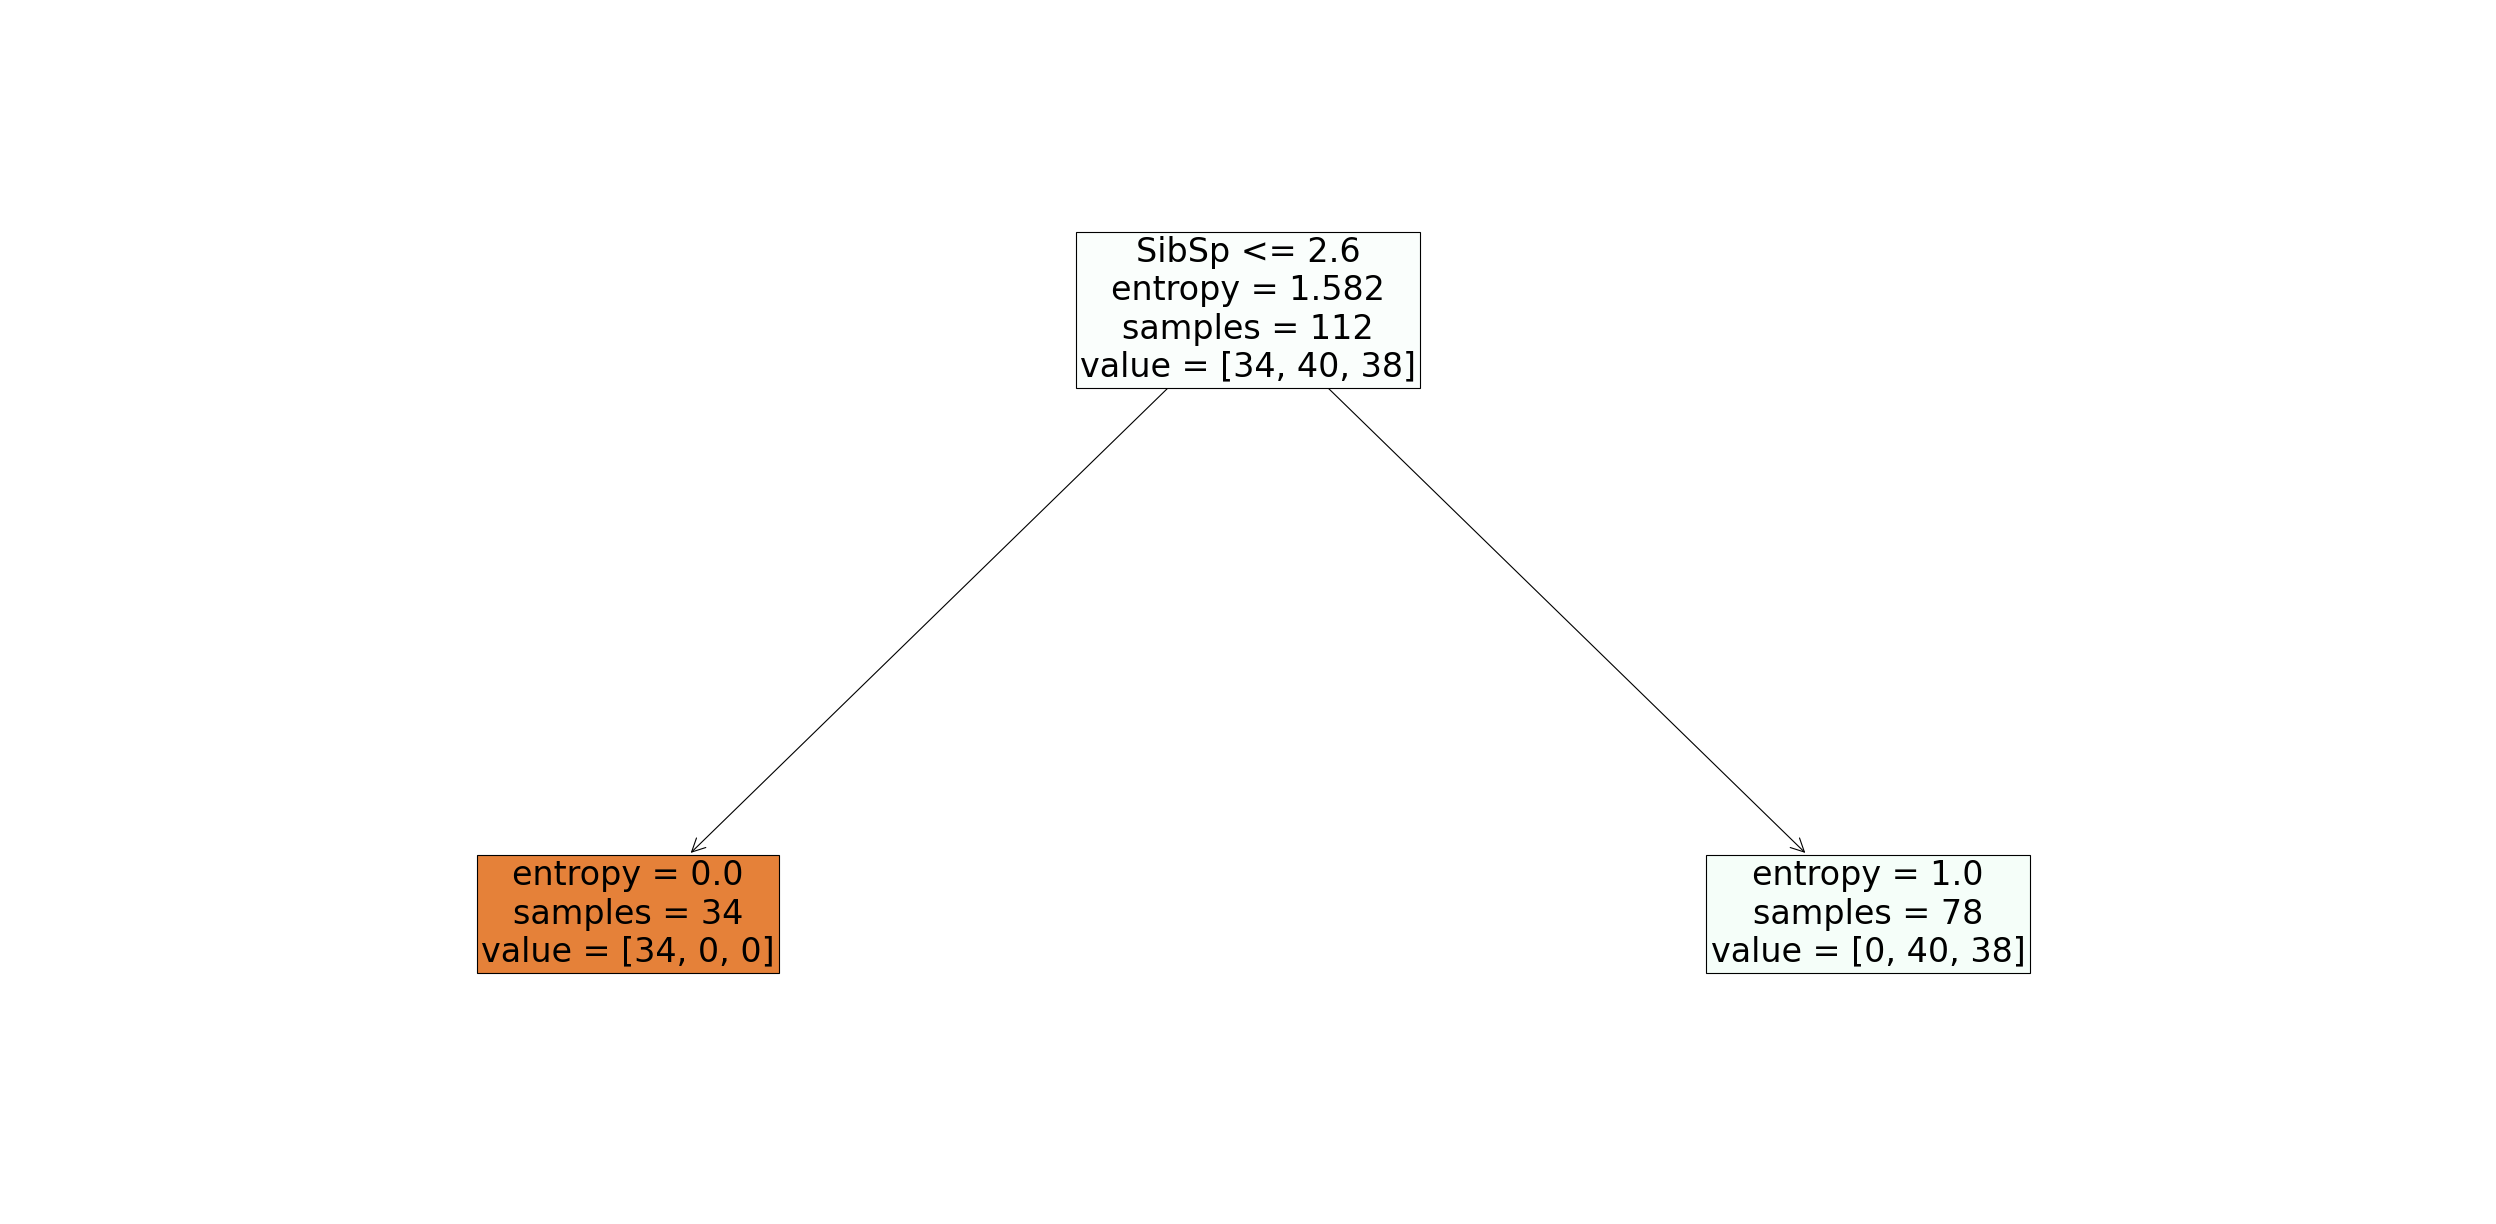

In [70]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=30,filled=True,feature_names=list(X_train))